In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

data_file='/Users/john/data-sets/creditcard.csv'
data=pd.read_csv(data_file,header=0)
print(data.dtypes.head())
print('Number of records:',len(data))
data.head()

Time    float64
V1      float64
V2      float64
V3      float64
V4      float64
dtype: object
Number of records: 284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data preprocessing

In [2]:
from sklearn.model_selection import train_test_split
feature_names=data.columns.values[:-1]
train_test_set = data[data.Class==0][feature_names]
train_set, test_set = train_test_split(train_test_set, test_size=0.2, random_state=42)
print('Whole data set:',len(data))
print('Train and test set:',len(train_test_set))
train_set.head()

Whole data set: 284807
Train and test set: 284315


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
228513,145544.0,-0.643139,0.323888,-0.253890,-0.229861,-0.320347,-0.337035,0.016371,0.511599,0.664531,...,-0.284546,0.264600,0.641559,0.167731,0.639755,-0.782464,0.447755,-0.108167,0.041705,100.22
45271,42274.0,1.225032,0.309672,0.075764,1.172093,0.049135,-0.352607,0.201216,-0.067050,-0.178754,...,-0.152394,-0.006992,0.112232,-0.198475,0.012800,0.853472,-0.257058,0.005308,-0.000296,1.00
115677,73968.0,1.095432,-0.082201,0.557413,0.672936,-0.471535,-0.151216,-0.182268,0.145532,0.146361,...,-0.138275,-0.138794,-0.375464,0.083377,0.224129,0.211780,0.211859,-0.021616,0.005800,28.90
161391,114146.0,0.225211,-0.101200,0.597409,-1.261143,-0.482422,-0.508390,0.338604,-0.122385,-0.962887,...,-0.402944,-0.242758,-0.249014,0.263371,1.144209,-0.580231,0.423566,-0.010651,0.016041,63.00
270370,164044.0,-2.001444,-1.084340,0.042545,-1.061416,1.004215,2.054346,2.173900,0.347613,-0.991819,...,1.054444,0.699938,1.070446,0.585468,-0.922432,1.156154,0.683653,-0.197059,0.055466,492.00


### Data preprocessing with StandardScaler

In [3]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# import matplotlib.pyplot as plt
# %matplotlib inline
# scaler1=MinMaxScaler().fit(train_set[['Time']])
# train_set['Time']=scaler1.transform(train_set[['Time']])
# test_set['Time']=scaler1.transform(test_set[['Time']])
# scaler2=StandardScaler().fit(train_set[['Amount']])
# train_set['Amount']=scaler2.transform(train_set[['Amount']])
# test_set['Amount']=scaler2.transform(test_set[['Amount']])

# train_set.hist(column=['Time','Amount','V1','V2'],bins=100)
# train_set.head()

In [4]:
# train_set=train_set.to_numpy()
# test_set=test.to_numpy()

### Data preprocessing using MinMaxScaler

array([[8.42327013e-01, 9.47367642e-01, 7.97217483e-01, 7.76227227e-01,
        2.41740662e-01, 5.43571003e-01, 5.15661441e-01, 4.19171267e-01,
        8.02040109e-01, 3.17799008e-01, 3.49988397e-01, 2.35464057e-01,
        6.15377573e-01, 4.10107015e-01, 5.99855337e-01, 4.48405051e-01,
        6.02247154e-01, 6.71423155e-01, 6.12703253e-01, 5.13449227e-01,
        4.11165178e-01, 6.10928994e-01, 5.39959714e-01, 6.67924552e-01,
        5.05950311e-01, 5.33984885e-01, 5.03033612e-01, 6.46853527e-01,
        2.57966091e-01, 5.09856012e-03],
       [2.44658194e-01, 9.79105547e-01, 7.97062325e-01, 7.83882282e-01,
        3.03888114e-01, 5.48372609e-01, 5.15350500e-01, 4.21609233e-01,
        7.95745386e-01, 2.79267731e-01, 3.87358807e-01, 3.75257082e-01,
        6.96864586e-01, 5.41487510e-01, 6.50882451e-01, 3.64243237e-01,
        5.45108394e-01, 6.30551391e-01, 5.31712561e-01, 5.85659779e-01,
        4.13125001e-01, 6.06201154e-01, 5.15266633e-01, 6.62486089e-01,
        4.14393519e-01,

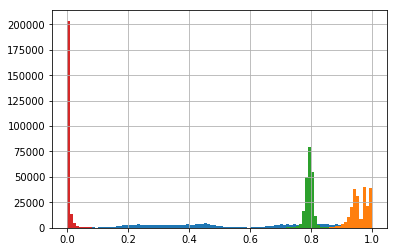

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
scaler=MinMaxScaler().fit(train_set)
train_set=scaler.transform(train_set)
test_set=scaler.transform(test_set)

pd.Series(train_set[:,0]).hist(bins=100)
pd.Series(train_set[:,1]).hist(bins=100)
pd.Series(train_set[:,2]).hist(bins=100)
pd.Series(train_set[:,-1]).hist(bins=100)
train_set[:5]

In [6]:
class autoencoder(nn.Module):
    def __init__(self,num_input):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_input, 15),
            nn.ReLU(True),
            nn.Linear(15, 7))
        self.decoder = nn.Sequential(
            nn.Linear(7, 15),
            nn.ReLU(True),
            nn.Linear(15, num_input),
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
num_epochs = 300
batch_size = 256
lr = 0.01

inputs = torch.tensor(train_set, dtype=torch.float32)
dataset = TensorDataset(inputs)
dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=4, shuffle=False)

In [8]:
model = autoencoder(inputs.shape[1])
model = model.cuda() if torch.cuda.is_available() else model
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)


def test():
    model.eval()

    with torch.no_grad():
        if torch.cuda.is_available():
            tests_=torch.tensor(test_set, dtype=torch.float32).cuda()
        else:
            tests_=torch.tensor(test_set, dtype=torch.float32)
        outputs = model(tests_)
        loss=criterion(outputs,tests_)
    #print(tests_,outputs)
    return loss.item()/(tests_.shape[0]*tests_.shape[1])


for epoch in range(num_epochs):
    model.train()
    loss_sum=0.0; num=0
    for inputs, in dataloader:
        if torch.cuda.is_available():
            inputs=inputs.cuda()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        loss_sum+=loss.item()
        num+=(inputs.shape[0]*inputs.shape[1])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1)%5 == 0:
        print('{} epoch [{}/{}], loss:{:.6f}, test_set_loss:{:.6f}'
                .format(datetime.now(), epoch + 1, num_epochs, loss_sum/num, test()))

2020-04-13 22:51:08.002994 epoch [5/300], loss:0.001127, test_set_loss:0.001151
2020-04-13 22:51:14.496320 epoch [10/300], loss:0.001087, test_set_loss:0.001092
2020-04-13 22:51:20.823426 epoch [15/300], loss:0.001082, test_set_loss:0.000939
2020-04-13 22:51:26.860341 epoch [20/300], loss:0.000886, test_set_loss:0.000886
2020-04-13 22:51:33.245403 epoch [25/300], loss:0.000885, test_set_loss:0.000903
2020-04-13 22:51:40.312289 epoch [30/300], loss:0.000883, test_set_loss:0.000900
2020-04-13 22:51:47.188794 epoch [35/300], loss:0.000882, test_set_loss:0.000886
2020-04-13 22:51:54.762346 epoch [40/300], loss:0.000862, test_set_loss:0.000861
2020-04-13 22:52:02.282541 epoch [45/300], loss:0.000856, test_set_loss:0.000849
2020-04-13 22:52:09.819187 epoch [50/300], loss:0.000873, test_set_loss:0.000870
2020-04-13 22:52:16.298288 epoch [55/300], loss:0.000852, test_set_loss:0.000843
2020-04-13 22:52:23.228737 epoch [60/300], loss:0.000850, test_set_loss:0.000842
2020-04-13 22:52:30.203175 ep

In [9]:
# model.eval()

# with torch.no_grad():
#     test_set2 = data[data.Class==1][feature_names]
#     test_set2['Time']=scaler1.transform(test_set2[['Time']])
#     test_set2['Amount']=scaler2.transform(test_set2[['Amount']])
#     inputs2=torch.tensor(test_set2.to_numpy(), dtype=torch.float32)
#     outputs2=model(inputs2)
#     loss2=torch.sum((inputs2-outputs2)**2,dim=1).sqrt().log()

#     test_set1=test_set.sample(n=len(loss2),random_state=42)
#     inputs1=torch.tensor(test_set1.to_numpy(), dtype=torch.float32)
#     outputs1=model(inputs1)
#     loss1=torch.sum((inputs1-outputs1)**2,dim=1).sqrt().log()

#     pd.Series(loss1.numpy()).hist(bins=100)
#     pd.Series(loss2.numpy()).hist(bins=100)
#     split_point=(loss1.max()+loss2.min())/2
#     print('Split point:',split_point)
#     print((loss1<split_point).sum().item()/float(len(loss1)))
#     print((loss2>split_point).sum().item()/float(len(loss2)))

Split point: tensor(-0.9834)
0.5853658536585366
0.9207317073170732


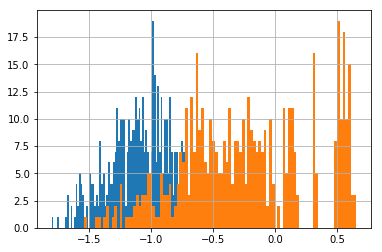

In [10]:
model.eval()

with torch.no_grad():
    test_set2 = data[data.Class==1][feature_names]
    test_set2=scaler.transform(test_set2)
    inputs2=torch.tensor(test_set2, dtype=torch.float32)
    outputs2=model(inputs2)
    loss2=torch.sum((inputs2-outputs2)**2,dim=1).sqrt().log()

    test_set1=test_set[np.random.choice(len(test_set),size=len(loss2),replace=False)]
    inputs1=torch.tensor(test_set1, dtype=torch.float32)
    outputs1=model(inputs1)
    loss1=torch.sum((inputs1-outputs1)**2,dim=1).sqrt().log()

    pd.Series(loss1.numpy()).hist(bins=100)
    pd.Series(loss2.numpy()).hist(bins=100)
    split_point=(loss1.max()+loss2.min())/2
    print('Split point:',split_point)
    print((loss1<split_point).sum().item()/float(len(loss1)))
    print((loss2>split_point).sum().item()/float(len(loss2)))

In [11]:
torch.save(model.state_dict(), '/Users/john/projects/cloudera-ml/anomaly-detection/creditcard-fraud-2.model')